In [1]:
# !pip install python-constraint

In [1]:
from constraint import Problem

# SCENARIO 1

In [2]:
# Define the problem
problem = Problem()

# Define the variables (roles)
roles = ["AI Engineer1", "AI Engineer2",  "Python Programmer", "Web Designer", "Database Admin", "Systems Engineer"]
problem.addVariables(roles, ["Peter", "Jim", "Jane", "Mary", "Bruce", "Anita"])

# Constraint: Need 2 AI Engineers with specific names
ai_engineer_names = ["Jim", "Peter", "Anita"]  # Specify the names
# Constraint: Need 2 AI Engineers with distinct names
problem.addConstraint(lambda AI1, AI2: len(set([AI1, AI2])) == 2, ("AI Engineer1", "AI Engineer2"))

# Constraint: Need 1 Python Programmer with specific names
#python_programmer_names = ["Bruce", "Jane", "Peter"]  # Specify the names
# Constraint: Need 1 Python Programmer with distinct names
problem.addConstraint(lambda PY1: PY1 in ["Bruce", "Jane", "Peter"], ["Python Programmer"])

# Constraint: Need 1 Web Designer
problem.addConstraint(lambda web: web in ["Juan", "Anita"], ["Web Designer"])

# Constraint: Need 1 Database Admin
problem.addConstraint(lambda db: db in ["Jane"], ["Database Admin"])

# Constraint: Need 1 Systems Engineer
problem.addConstraint(lambda sys: sys in ["Jim", "Mary", "Bruce"], ["Systems Engineer"])

# Constraint: Select only 6 employees
problem.addConstraint(lambda *selected: len(set(selected)) == 3, roles)

# Solve the problem
solution = problem.getSolutions()
solutions = solution[1]

print(solutions)

{'AI Engineer1': 'Anita', 'AI Engineer2': 'Bruce', 'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Python Programmer': 'Jane', 'Systems Engineer': 'Bruce'}


# SCENARIO 2

In [3]:
from constraint import Problem

# Define the problem
problem = Problem()

# Define the variables (roles)
roles = ["AI Engineer1", "AI Engineer2", "AI Engineer3", "Python Programmer1", "Python Programmer2", "Web Designer", "Database Admin", "Systems Engineer"]
problem.addVariables(roles, ["Peter",  "Jim", "Jane", "Mary", "Bruce", "Anita"])

# Constraint: Need 3 AI Engineers with specific names
ai_engineer_names = ["Jim", "Peter", "Anita"]  # Specify the names
# Constraint: Need 3 AI Engineers with distinct names
problem.addConstraint(lambda ai1, ai2, ai3: len(set([ai1, ai2, ai3])) == 3, ("AI Engineer1", "AI Engineer2", "AI Engineer3"))

# Constraint: Need 2 Python Programmers with specific names
python_programmer_names = ["Bruce", "Jane", "Peter"]  # Specify the names
# Constraint: Need 2 Python Programmers with distinct names
problem.addConstraint(lambda py1, py2: len(set([py1, py2])) == 2, ("Python Programmer1", "Python Programmer2"))


# Constraint: Need 1 Web Designer
problem.addConstraint(lambda web: web in ["Juan", "Anita"], ["Web Designer"])

# Constraint: Need 1 Database Admin
problem.addConstraint(lambda db: db in ["Jane"], ["Database Admin"])

# Constraint: Need 1 Systems Engineer
problem.addConstraint(lambda sys: sys in ["Jim", "Mary", "Bruce"], ["Systems Engineer"])

# Constraint: Select only 4 employees
problem.addConstraint(lambda *selected: len(set(selected)) == 4, roles)

# Solve the problem
solution = problem.getSolutions()
solutions = solution[1]

print(solutions)

{'AI Engineer1': 'Anita', 'AI Engineer2': 'Bruce', 'AI Engineer3': 'Mary', 'Python Programmer1': 'Anita', 'Python Programmer2': 'Bruce', 'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary'}


# Tasks for Data Visualisation

# Interact with the GUI:

* Dropdowns: 
Use the dropdowns to assign employees to different roles. The visualizations will update automatically.
* Visualizations: 
The script includes bar charts and a network diagram to visualize role assignments.
* Close the GUI:
Close the GUI window when you're done.

**Keep in mind that this script uses the Tkinter library for the GUI and Matplotlib for data visualization. The code defines functions for updating and redrawing visualizations, and it includes event handling for changes in role assignments.**

c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator


{'AI Engineer1': 'Jim', 'AI Engineer2': 'Peter', 'Python Programmer': 'Jane', 'Web Designer': 'Anita', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'}


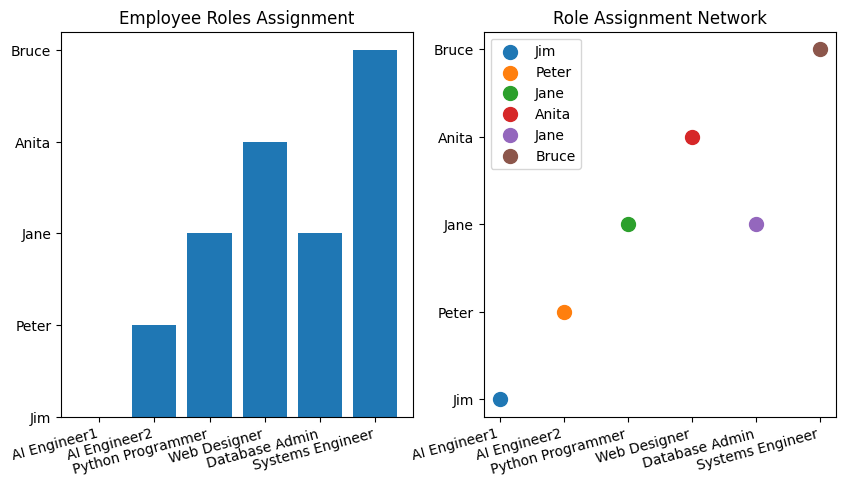

In [5]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Sample data
roles = ["AI Engineer1", "AI Engineer2", "Python Programmer", "Web Designer", "Database Admin", "Systems Engineer"]
employees = ["Peter", "Jim", "Jane", "Mary", "Bruce", "Anita"]

# Initial role assignments
assignments = {"AI Engineer1": "Jim", "AI Engineer2": "Peter", "Python Programmer": "Jane",
               "Web Designer": "Anita", "Database Admin": "Jane", "Systems Engineer": "Bruce"}

# Function to update and redraw visualizations
def update_visualizations():
    print(assignments)
    # Update Bar Chart
    roles = list(assignments.keys())
    employees = list(assignments.values())

    ax1.clear()
    ax1.bar(roles, employees)
    ax1.set_title('Employee Roles Assignment')
    ax1.set_xticklabels(roles, rotation=15, ha='right')  # Rotate x-axis labels

    # Update Network Diagram
    ax2.clear()
    for role, employee in assignments.items():
        ax2.scatter(role, employee, marker='o', s=100, label=employee)
    ax2.set_title('Role Assignment Network')
    ax2.set_xticklabels(roles, rotation=15, ha='right')
    ax2.legend()
    canvas.draw()

# Function to handle role assignment changes
def on_role_assignment_change(*args):
    for i, role in enumerate(roles):
        assignments[role] = role_assignments[i].get()
    update_visualizations()

# Create main window
root = tk.Tk()
root.title("AI Team Role Assignment")

# Create role assignment dropdowns
role_assignments = [tk.StringVar(root) for _ in roles]
for i, role in enumerate(roles):
    ttk.Label(root, text=f"{role}:").grid(row=i, column=0, sticky='e')
    ttk.Combobox(root, textvariable=role_assignments[i], values=employees).grid(row=i, column=1)
    role_assignments[i].set(assignments[role])
    role_assignments[i].trace_add('write', on_role_assignment_change)

# Create Matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Initial visualizations
role_counts = [list(assignments.values()).count(role) for role in roles]
ax1.bar(roles, role_counts, color='skyblue')
ax1.set_title('Role Distribution')
ax1.set_xticklabels(roles, rotation=15, ha='right')  # Rotate x-axis labels

print(assignments)
# Update Bar Chart
roles = list(assignments.keys())
employees = list(assignments.values())

ax1.clear()
ax1.bar(roles, employees)
ax1.set_title('Employee Roles Assignment')
ax1.set_xticklabels(roles, rotation=15, ha='right')  # Rotate x-axis labels

for role, employee in assignments.items():
    ax2.scatter(role, employee, marker='o', s=100, label=employee)

ax2.set_title('Role Assignment Network')
ax2.set_xticklabels(roles, rotation=15, ha='right')
ax2.legend()

# Embed Matplotlib figure in Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(row=0, column=2, rowspan=len(roles), padx=10)

# Run the GUI
root.mainloop()